<a href="https://colab.research.google.com/github/NumericalAnalysis-YTU/FIZ4610-Computational-Physics/blob/main/lab_differentiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Differentiation** - calculating the first derivative and the higher order derivatives

In [20]:
import numpy as np

# Define the finite step
h = 0.01

# Define method
method = 'central'

# Set range for plotting
x_min =  1
x_max =  8

# Define function
def f(x):
#    return 1/x
   return 3*x**3+2*x**2+x

In [21]:

# First derivative
def first_c(f,a,method='central',h=0.01):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")


In [22]:

# Second derivative
def second_c(f,a,method='central',h=0.01):

    if method == 'central':
        return (first_c(f,a + h,method,h) - first_c(f,a - h,method,h))/(2*h)
    elif method == 'forward':
        return (first_c(f,a + h,method,h) - first_c(f,a,method,h))/h
    elif method == 'backward':
        return (first_c(f,a,method,h) - first_c(f,a - h,method,h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")


In [23]:

# Third derivative
def third_c(f,a,method='central',h=0.01):

    if method == 'central':
        return (second_c(f,a + h,method,h) - second_c(f,a - h,method,h))/(2*h)
    elif method == 'forward':
        return (second_c(f,a + h,method,h) - second_c(f,a,method,h))/h
    elif method == 'backward':
        return (second_c(f,a,method,h) - second_c(f,a - h,method,h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")



# **Print the function and it's derivatives**

In [24]:


print("Using central difference: \n")
print("     x       function     first_c      second_c              third_c")
for x in range(x_min,x_max):
    print(x, f(x), first_c(f,x,method,h), second_c(f,x,method,h), third_c(f,x,method,h))



Using central difference: 

     x       function     first_c      second_c              third_c
1 6 14.000299999999966 21.999999999997577 18.00000000040658
2 34 45.00029999999917 39.99999999997783 18.000000002516003
3 102 94.00029999999902 58.000000000006935 17.99999999363422
4 228 161.00029999999492 75.99999999996498 18.0000000149505
5 430 246.0002999999972 93.99999999999409 17.999999968765223
6 726 349.0002999999831 111.99999999973898 18.00000008245206
7 1134 470.0002999999924 129.99999999976808 17.999999982976078


# **Plot the function and it's derivatives**

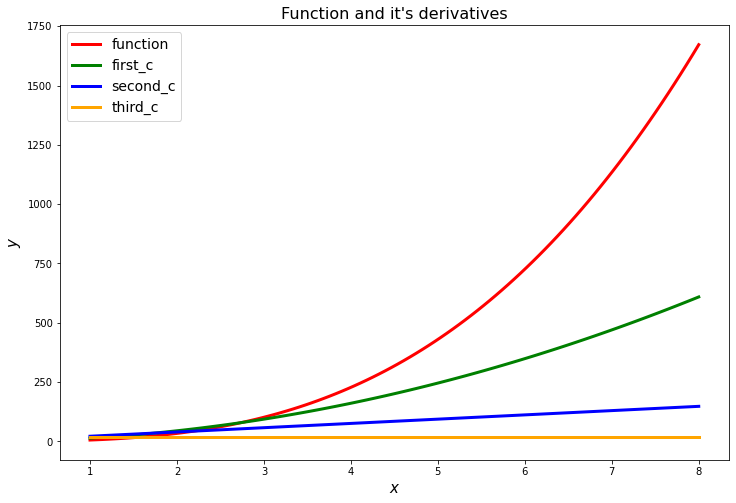

In [25]:
# Plot the function and it's derivatives
import matplotlib.pyplot as plt


plt.figure(figsize=(12,8))
plt.title("Function and it's derivatives",fontsize=16) 

xlin = np.linspace(x_min, x_max, num=100)
plt.plot(xlin,f(xlin),linewidth=3,color='red',linestyle='solid', label="function")
plt.plot(xlin,first_c(f,xlin,method,h),linewidth=3,color='green',linestyle='solid', label="first_c")
plt.plot(xlin,second_c(f,xlin,method,h),linewidth=3,color='blue',linestyle='solid', label="second_c")
plt.plot(xlin,third_c(f,xlin,method,h),linewidth=3,color='orange',linestyle='solid', label="third_c")


plt.legend(prop={'size':14})

plt.xlabel('$x$',fontsize=15)
plt.ylabel('$y$',fontsize=15);

    
plt.show()